In [ ]:
#time series date vs. sentiment score -all the reviews vs. top 5 reviewed branches
#same graph for all the years

In [27]:
#split the date part to year and month
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

In [12]:
#Read the dataframe with predicted sentiment scores
BOW_predicts = pd.read_json('BOW_predictions.json', lines=True)

In [ ]:
BOW_predicts["year"] = BOW_predicts["date"].dt.year
BOW_predicts["month"] = BOW_predicts["date"].dt.month
BOW_predicts["day"] = BOW_predicts["date"].dt.day
BOW_predicts

,user_id,business_id,stars,useful,funny,cool,text,date,name,review_count,categories,address,city,state,postal_code,stars_3_scale,bow_predicted_sentiment,year,month,day
0,veBX5roHQLNnQ1rTtNh_gg,aJvxWyQIG5OLfBw3qAe8xA,2,0,0,0,"Ordered Caramel frappe at Drive thru, BIG MIST...",2017-12-29 19:38:31,Starbucks,65,"Restaurants, Coffee & Tea, Food",2308 Murfreesboro Pike,Nashville,TN,37217,1,1,2017,12,29
1,zZygOZLNyJX5nDqKrwa4HQ,MjZQqZAmJeMco_Vq-Y9h-g,4,0,0,0,Drum-roll please! Review #100 coming right up!...,2014-02-05 19:38:24,Starbucks,33,"Food, Coffee & Tea",13170 North Hazel Dell Pkwy,Carmel,IN,46033,3,3,2014,2,5
2,0SpK7eVn5TrpyQKPaohVBw,u7MJKcNdZXYyTeb67vD5jw,4,1,0,0,We stopped here for my Chai and Hubby's coffee...,2017-02-09 04:35:39,Starbucks,17,"Food, Coffee & Tea",5 Hartford Rd,Mount Laurel,NJ,08054,3,3,2017,2,9
3,IVnrNZ8npRx04jkNp6-ERA,saJFbz12EnzanelpD8_xXQ,2,0,0,0,There's been three times that I've ordered a g...,2016-08-25 14:08:18,Starbucks,95,"Food, Coffee & Tea",10716 Big Bend Rd,Riverview,FL,33579,1,3,2016,8,25
4,tgP2gKsf3O9MyuLuolv2oQ,KiE0h68HGOO7ZXAqkMBdiw,1,0,1,0,"I went in when they had 4 people working, wait...",2016-01-30 01:10:42,Starbucks,35,"Food, Coffee & Tea",1015 De La Vina St,Santa Barbara,CA,93101,1,1,2016,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21570,QPDFn3SQqZeBu7OBI78g9w,-85kJMtb9wqNWDT8yLbitw,3,0,0,0,Fair service- messed up my drink cuppa times....,2021-12-13 22:08:14,Starbucks,34,"Food, Coffee & Tea","438 Main St, Space 168, Space 168",Franklin,TN,37064,2,1,2021,12,13
21571,F3ELBqGgDCX9YEhz_oS0xQ,Ddg-J_j0YFErk7wpMtH_0A,5,3,1,4,On my way out of Reno last week I noted a new ...,2021-12-28 19:26:37,Starbucks,67,"Food, Coffee & Tea, Coffee Roasteries",986 Ambassador Dr,Reno,NV,89523,3,3,2021,12,28
21572,TZJzzQsE4R7RmqkVRaLEKw,2rmpfdyV2POqpXtmPHO_IQ,1,0,0,0,always closing drive thru. i've driven here so...,2021-12-28 18:12:04,Starbucks,27,"Coffee & Tea, Food",6363 N La Cholla,Tucson,AZ,85741,1,1,2021,12,28
21573,dvu83QWKsnnbGvNVQ3mv7A,GxuxCctcz3Hyk0wnuly7vQ,4,1,0,1,This is now one of two Starbucks in the shoppi...,2017-01-21 00:19:27,Starbucks,45,"Food, Coffee & Tea",4811 E Grant,Tucson,AZ,85712,3,3,2017,1,21


In [ ]:
#gruoup by day city, rolling average by 7 days
BOW_predicts = BOW_predicts.groupby(['day', 'city']).agg({'bow_predicted_sentiment': 'mean'}).reset_index()

In [41]:
# Group by day and city, compute mean sentiment_score
grouped = BOW_predicts.groupby(['date', 'city']).agg({'bow_predicted_sentiment': 'mean'}).reset_index()

# Ensure day is datetime and sort for correct rolling
grouped['date'] = pd.to_datetime(grouped['date'])
grouped = grouped.sort_values('date')

# Set day as index for rolling
grouped = grouped.set_index('date')

# Calculate 7-day rolling average for each city
result = grouped.groupby('city')['bow_predicted_sentiment'].rolling('7D').mean().reset_index()


In [42]:
result

,city,date,bow_predicted_sentiment
0,Abington,2015-12-31 21:50:19,3.0
1,Abington,2016-04-01 20:12:03,1.0
2,Abington,2016-04-07 14:47:17,2.0
3,Abington,2016-09-08 20:46:27,3.0
4,Abington,2016-09-22 20:45:03,3.0
...,...,...,...
21570,Zionsville,2019-02-25 15:34:56,1.0
21571,Zionsville,2019-06-01 13:52:14,1.0
21572,Zionsville,2019-06-16 23:23:42,1.0
21573,Zionsville,2019-09-16 21:31:06,3.0


In [44]:
v = BOW_predicts[['city', 'year']].value_counts().sort_values(ascending=False)
v

city          year
Philadelphia  2017    236
              2018    234
Indianapolis  2019    219
Tucson        2019    219
Indianapolis  2018    217
                     ... 
Fishers       2006      1
Ferguson      2022      1
Glen Mills    2021      1
Ferguson      2020      1
Zionsville    2020      1
Name: count, Length: 1919, dtype: int64

In [50]:
v = BOW_predicts['bow_predicted_sentiment'].value_counts()
v

bow_predicted_sentiment
3    12146
1     9353
2       76
Name: count, dtype: int64

In [16]:
BOW_predicts["year"].unique()

array([2017, 2014, 2016, 2015, 2013, 2011, 2012, 2010, 2018, 2009, 2008,
       2019, 2020, 2021, 2022, 2005, 2006, 2007])

In [24]:
import plotly.express as px

In [36]:
year = 2021
cities = ['Philadelphia', 'Indianapolis', 'Tampa', 'Tucson', 'Reno']  # replace with your actual city names
filtered_df = BOW_predicts[(BOW_predicts["year"] == year) & (BOW_predicts["city"].isin(cities))]


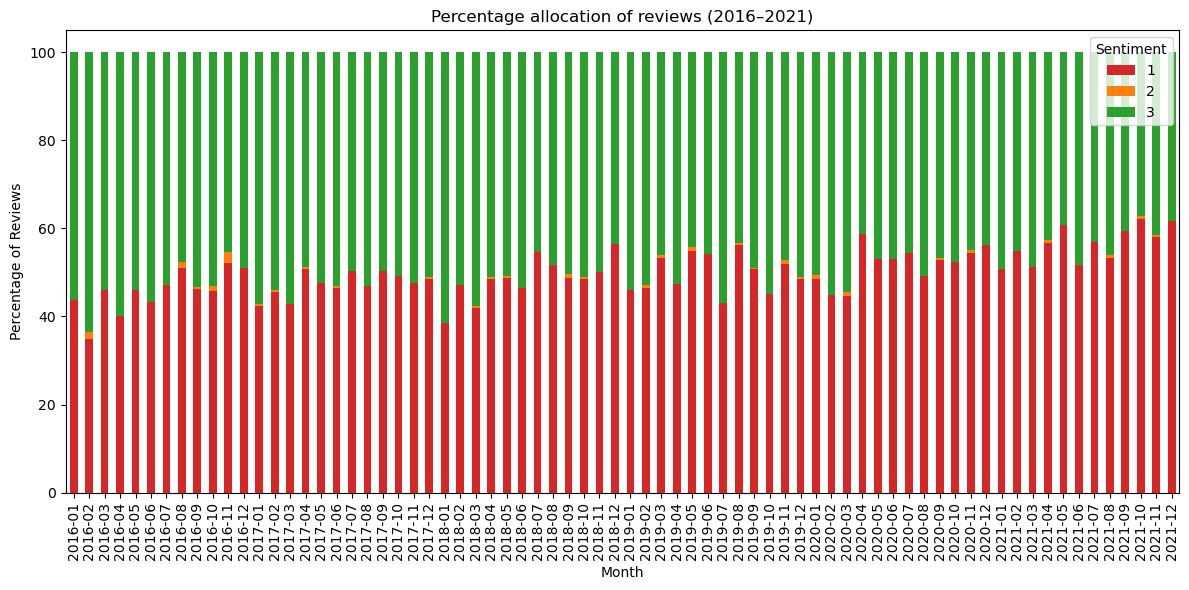

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date is datetime and extract month and year
BOW_predicts['date'] = pd.to_datetime(BOW_predicts['date'])
BOW_predicts['month'] = BOW_predicts['date'].dt.to_period('M')
BOW_predicts['year'] = BOW_predicts['date'].dt.year

# Filter for years 2016 to 2021
filtered_df = BOW_predicts[(BOW_predicts['year'] >= 2016) & (BOW_predicts['year'] <= 2021)]

# Group by month and sentiment, count occurrences
sentiment_counts = filtered_df.groupby(['month', 'bow_predicted_sentiment']).size().unstack(fill_value=0)

# Calculate percentage for each sentiment per month
sentiment_percent = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

# Plot as stacked bar chart
sentiment_percent.plot(
    kind='bar',
    stacked=True,
    color=['#d62728', '#ff7f0e', '#2ca02c'],  # red=negative, orange=neutral, green=positive
    figsize=(12, 6)
)
plt.ylabel('Percentage of Reviews')
plt.xlabel('Month')
plt.title('Percentage allocation of reviews (2016–2021)')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


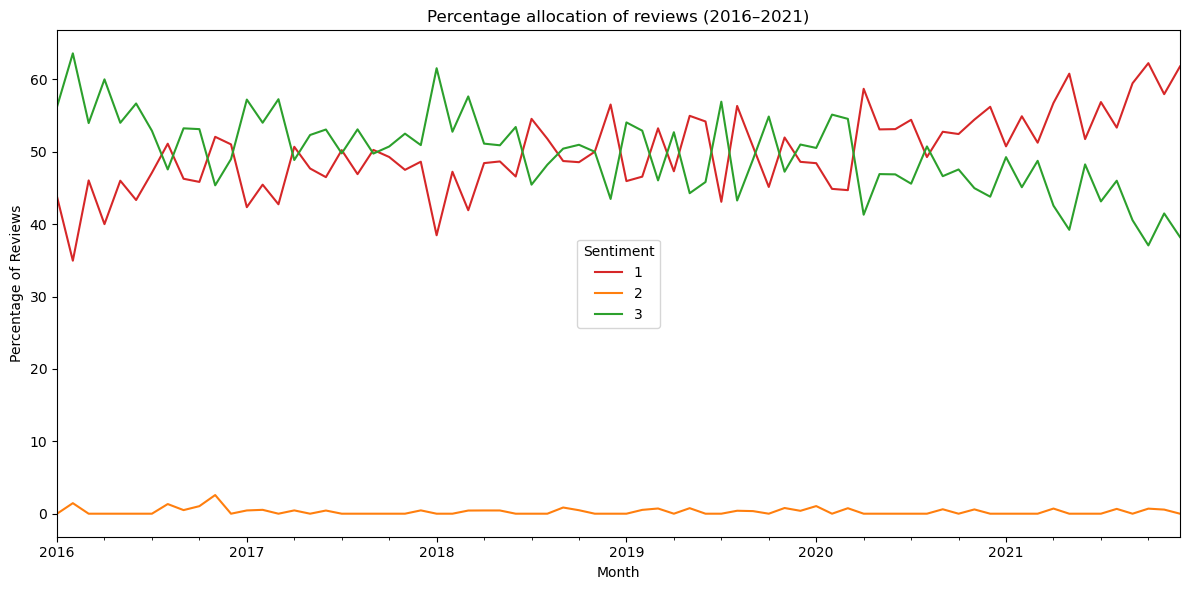

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date is datetime and extract month and year
BOW_predicts['date'] = pd.to_datetime(BOW_predicts['date'])
BOW_predicts['month'] = BOW_predicts['date'].dt.to_period('M')
BOW_predicts['year'] = BOW_predicts['date'].dt.year

# Filter for years 2016 to 2021
filtered_df = BOW_predicts[(BOW_predicts['year'] >= 2016) & (BOW_predicts['year'] <= 2021)]

# Group by month and sentiment, count occurrences
sentiment_counts = filtered_df.groupby(['month', 'bow_predicted_sentiment']).size().unstack(fill_value=0)

# Calculate percentage for each sentiment per month
sentiment_percent = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

# Plot as stacked bar chart
sentiment_percent.plot(
    kind='line',
    #stacked=True,
    color=['#d62728', '#ff7f0e', '#2ca02c'],  # red=negative, orange=neutral, green=positive
    figsize=(12, 6)
)
plt.ylabel('Percentage of Reviews')
plt.xlabel('Month')
plt.title('Percentage allocation of reviews (2016–2021)')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()
